In [50]:
# Importing and setting up
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # additional plotting tools
from sosp import simple
from itertools import product

# Verb choice: settle on a noun-verb link -> number marking
centers = np.array([[1, 0], [0, 1.]]) # N1-V, N2-V
gamma = 0.25  # 0.4 = default, but this is what I used for the diss. simulations

# Trying starting w/ 0.5 b/c very low h_i --> failure to build a parse
h1seq = np.round(np.arange(0.0, 1.05, 0.05), 2)
h0 = np.ones(h1seq.shape)
cond_names = []
for i, j in product(h0, h1seq):
    cond_names.append('h0_{}_h1_{}'.format(i, j))

cond_harmonies = np.column_stack([h0, h1seq])
print(cond_harmonies.shape)
cond_harmonies
nruns = 1000

(21, 2)


In [51]:
xinit = np.zeros(centers.shape[1])
sys = simple.SimpleModel(corpus_filename=None, centers=centers, local_harmonies=np.array([1., 1.]),
                         stopping_crit='cheb_stop')
sys.set_gamma(gamma)
sys.set_noise_mag(0.0005)  # What was used in the diss.
sys.locate_attrs()

Found 2 unique attractors from 2 centers


In [52]:
data = sys.run_multiple_conditions(n_runs=nruns, conditions=cond_harmonies)

Found 1 unique attractors from 2 centers
Condition 0
Run number:
[0] [100] [200] [300] [400] [500] [600] [700] [800] [900] Found 1 unique attractors from 2 centers
Condition 1
Run number:
[0] [100] [200] [300] [400] [500] [600] [700] [800] [900] Found 1 unique attractors from 2 centers
Condition 2
Run number:
[0] [100] [200] [300] [400] [500] [600] [700] [800] [900] Found 1 unique attractors from 2 centers
Condition 3
Run number:
[0] [100] [200] [300] [400] [500] [600] [700] [800] [900] Found 1 unique attractors from 2 centers
Condition 4
Run number:
[0] [100] [200] [300] [400] [500] [600] [700] [800] [900] Found 1 unique attractors from 2 centers
Condition 5
Run number:
[0] [100] [200] [300] [400] [500] [600] [700] [800] [900] Found 1 unique attractors from 2 centers
Condition 6
Run number:
[0] [100] [200] [300] [400] [500] [600] [700] [800] [900] Found 1 unique attractors from 2 centers
Condition 7
Run number:
[0] [100] [200] [300] [400] [500] [600] [700] [800] [900] Found 1 unique a

In [53]:
data['Cond'] = np.repeat(h1seq, nruns)

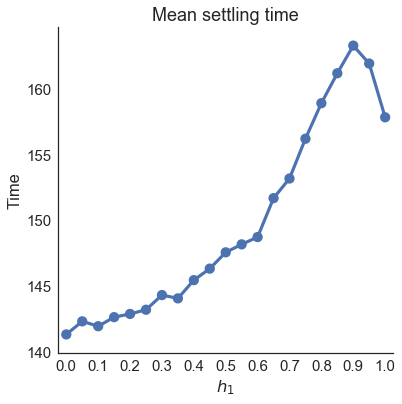

In [89]:
means = data.groupby('Cond').Time.agg('mean')
sns.set(font_scale=1.5, style='white')
plt.figure(figsize=[6,6])
g = sns.pointplot(x=h1seq, y=means)
sns.despine()
plt.title('Mean settling time')
plt.xlabel('$h_1$')
plt.setp(g.get_xticklabels()[1::2], visible=False)
plt.show()

In [97]:
g.figure.savefig('LC_AA.pdf')